# Data Mining - Redes Neuronales Artificiales 🧠

**Authors:** [Melissa Perez](https://github.com/MelissaPerez09), [Adrian Flores](https://github.com/adrianRFlores), [Andrea Ramirez](https://github.com/Andrea-gt)

**Description:**

## Import Libraries ⬇️

In [32]:
# Standard libraries
import time
import warnings
warnings.filterwarnings('ignore')

# Data manipulation and visualization
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

# Machine learning models and tools
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict, GridSearchCV
from sklearn.preprocessing import StandardScaler, OrdinalEncoder
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import (confusion_matrix, accuracy_score, precision_score,
                             recall_score, mean_squared_error, mean_absolute_error,
                             r2_score, classification_report, f1_score, ConfusionMatrixDisplay)
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import learning_curve

from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam

# Set matplotlib inline
%matplotlib inline

# Set random state
random_state = 42

# Set default figure size
plt.rcParams['figure.figsize'] = (6, 4)

## Data Upload 📄

In [4]:
df = pd.read_csv('./data/train.csv')
df

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


## Exploratory Analysis 🔎

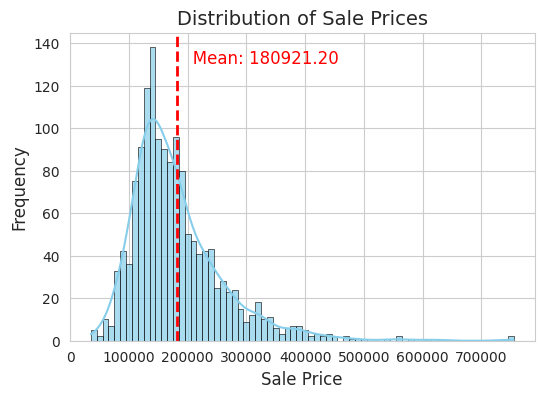

In [5]:
sns.set_style("whitegrid")

# Plotting the histogram of 'SalePrice' column from DataFrame 'df'
sns.histplot(x='SalePrice', data=df, kde=True, color='skyblue', binwidth=10000, alpha=0.7, edgecolor='black')

# Plot settings
plt.title('Distribution of Sale Prices', fontsize=14, fontweight='500')
plt.xlabel('Sale Price', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

# Calculating the mean of 'SalePrice' column
mean_value = df['SalePrice'].mean()

# Adding a vertical line representing the mean value
plt.axvline(mean_value, color='r', linestyle='--', linewidth=2)

# Adding text annotation for the mean value
plt.text(mean_value, plt.ylim()[1]*0.9, '   Mean: {:.2f}'.format(mean_value), color='r', fontsize=12)

plt.show()

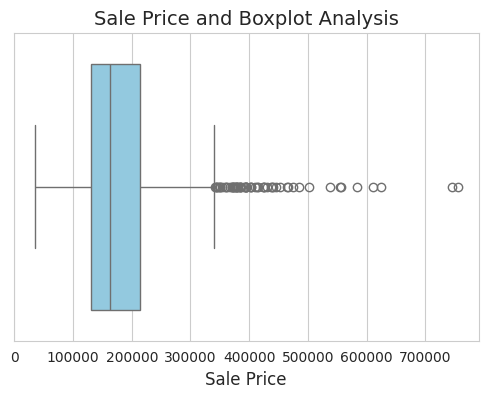

In [6]:
sns.set_style("whitegrid")

# Plotting the boxplot of 'SalePrice' column from DataFrame 'df'
sns.boxplot(x='SalePrice', data=df, color='skyblue')

# Plot settings
plt.title('Sale Price and Boxplot Analysis', fontsize=14, fontweight='500')
plt.xlabel('Sale Price', fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

plt.show()

## Data Preprocessing 🗂️

### Handling Missing Values

In [7]:
# Fill missing values in low NaN count columns
df['Electrical'] = df['Electrical'].fillna('None')
df['MasVnrType'] = df['MasVnrType'].fillna('None')
df['MasVnrArea'] = df['MasVnrArea'].fillna(0)

In [8]:
# Impute missing LotFrontage values based on the median LotFrontage within each neighborhood.
df['LotFrontage'] = df.groupby('Neighborhood')['LotFrontage'].transform(lambda x: x.fillna(x.median()))

In [9]:
# Fill missing values in FireplaceQu with 'None'.
df['FireplaceQu'] = df['FireplaceQu'].fillna('None')

In [10]:
# Fill missing values in garage-related variables with 'None'.
df['GarageType'] = df['GarageType'].fillna('None')
df['GarageYrBlt'] = df['GarageYrBlt'].fillna(0)
df['GarageFinish'] = df['GarageFinish'].fillna('None')
df['GarageQual'] = df['GarageQual'].fillna('None')
df['GarageCond'] = df['GarageCond'].fillna('None')

In [11]:
# Fill missing values in basement-related variables with 'None'.
df['BsmtQual'] = df['BsmtQual'].fillna('None')
df['BsmtCond'] = df['BsmtCond'].fillna('None')
df['BsmtExposure'] = df['BsmtExposure'].fillna('None')
df['BsmtFinType1'] = df['BsmtFinType1'].fillna('None')
df['BsmtFinType2'] = df['BsmtFinType2'].fillna('None')

In [12]:
# Drop columns with a high count of missing values
df.drop(['Alley', 'PoolQC', 'Fence', 'MiscFeature'], axis=1, inplace=True)

In [13]:
# Show columns with NaN values
nullValues = df.isnull().sum()
nullValues = nullValues[nullValues > 0]

if not nullValues.empty:
    print("Columns with NaN values:")
    print("-" * 40)
    for column, nans in nullValues.items():
        print(f"{column: <30} | {nans: >5} missing values")
    print("-" * 40)
else:
    print("No columns with NaN values found.")

No columns with NaN values found.


### Feature Engineering

In [14]:
# Define conditions for categorizing SalePrice
conditions = [
    (df['SalePrice'] < 150000),
    (df['SalePrice'] >= 150000) & (df['SalePrice'] <= 250000),
    (df['SalePrice'] > 250000)
]

# Define labels for the categories
labels = [0, 1, 2]

# Create a new column 'SalePriceCategory' based on the conditions and labels
df['SalePriceCategory'] = np.select(conditions, labels)

df

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,...,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,SalePriceCategory
0,1,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,2,2008,WD,Normal,208500,1
1,2,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,...,0,0,0,0,5,2007,WD,Normal,181500,1
2,3,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,...,0,0,0,0,9,2008,WD,Normal,223500,1
3,4,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,...,0,0,0,0,2,2006,WD,Abnorml,140000,0
4,5,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,...,0,0,0,0,12,2008,WD,Normal,250000,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,8,2007,WD,Normal,175000,1
1456,1457,20,RL,85.0,13175,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,2,2010,WD,Normal,210000,1
1457,1458,70,RL,66.0,9042,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,2500,5,2010,WD,Normal,266500,2
1458,1459,20,RL,68.0,9717,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,4,2010,WD,Normal,142125,0


### Encoding

In [15]:
# Columns to encode, separated by feature category
nominalFeatures = ['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
                    'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
                    'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'Foundation',
                    'Heating', 'CentralAir', 'Electrical', 'GarageType', 'SaleType',
                    'SaleCondition','PavedDrive']

ordinalFeatures = ['ExterQual', 'ExterCond', 'BsmtQual', 'BsmtCond', 'HeatingQC', 'KitchenQual','FireplaceQu',
                    'GarageQual', 'GarageCond']

otherOrdinalFeatures = ['BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Functional', 'GarageFinish']

In [16]:
# Convert nominal features into dummy variables
df = pd.get_dummies(df, columns = nominalFeatures)

In [17]:
# Define ordinal categories for each ordinal feature
ordinalCategories = [['None', 'Po', 'Fa', 'TA', 'Gd', 'Ex'] for _ in ordinalFeatures]

# Create an ordinal encoder
ordinalEncoder = OrdinalEncoder(categories=ordinalCategories)

# Fit and transform ordinal features
ordinalEncoded = ordinalEncoder.fit_transform(df[ordinalFeatures])

# Update dataframe with ordinal encoded features
for i, feature in enumerate(ordinalFeatures):
    df[feature] = ordinalEncoded[:, i]

In [18]:
# Define encoding categories for each other ordinal feature
encodingCategories = [
    ['None', 'No', 'Mn', 'Av', 'Gd'],  # BsmtExposure
    ['None', 'Unf', 'LwQ', 'Rec', 'BLQ', 'ALQ', 'GLQ'],  # BsmtFinType1
    ['None', 'Unf', 'LwQ', 'Rec', 'BLQ', 'ALQ', 'GLQ'],  # BsmtFinType2
    ['Sev', 'Maj2', 'Maj1', 'Mod', 'Min2', 'Min1', 'Typ'], # Functional
    ['None', 'Unf', 'RFn', 'Fin']  # GarageFinish
]

# Create an ordinal encoder
ordinalEncoder = OrdinalEncoder(categories=encodingCategories)

# Fit and transform other ordinal features
ordinalEncoded = ordinalEncoder.fit_transform(df[otherOrdinalFeatures])

# Update dataframe with ordinal encoded features
for i, feature in enumerate(otherOrdinalFeatures):
    df[feature] = ordinalEncoded[:, i]

### Splitting DataSet

In [20]:
# Create a copy of the dataframe
df_cp = df.copy()

# Remove SalePrice from the dataframe
df_cp.pop('SalePrice')

# Separate target variable 'SalePriceCategory' from features
y = df_cp.pop('SalePriceCategory')
X = df_cp

In [21]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, train_size=0.8, random_state=random_state)

In [22]:
print(X_train.shape)
print(X_test.shape)

(1168, 225)
(292, 225)


In [23]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1168 entries, 254 to 1126
Columns: 225 entries, Id to PavedDrive_Y
dtypes: bool(174), float64(17), int64(34)
memory usage: 673.0 KB


In [24]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Index: 292 entries, 892 to 722
Columns: 225 entries, Id to PavedDrive_Y
dtypes: bool(174), float64(17), int64(34)
memory usage: 168.2 KB


### Feature Standarization

In [25]:
# Scale the features in the training set
sc = StandardScaler()
X_train = sc.fit_transform(X_train)

# Scale the features in the test set
X_test = sc.transform(X_test)

## Multi-layer Perceptron Classifiers 🖥

### Initial Iteration Using Different Topologies & Activation Functions

In [27]:
# Creating MLP classifier with tanh activation function and (6,3) hidden layer sizes
mlp_tanh = MLPClassifier(activation='tanh', hidden_layer_sizes=(6,3), max_iter=1000, random_state=random_state)

# Recording start time
start_time = time.time()

# Fitting the MLP classifier to training data
mlp_tanh.fit(X_train, y_train)

# Recording end time
end_time = time.time()

# Calculating training accuracy for tanh model
train_accuracy_tanh = accuracy_score(y_train, mlp_tanh.predict(X_train))

# Calculating testing accuracy for tanh model
test_accuracy_tanh = accuracy_score(y_test, mlp_tanh.predict(X_test))

# Printing training time with tanh activation function and (6, 3) hidden layer sizes
print('Model with tanh activation function and (6, 3) hidden layer sizes:')
print('Training time: {:.4f} seconds'.format(end_time - start_time))
print('Training accuracy: {:.2f}%'.format(train_accuracy_tanh * 100))
print('Testing accuracy: {:.2f}%'.format(test_accuracy_tanh * 100))
print('-' * 30)  # Separate with dashes

# Creating MLP classifier with logistic activation function and (3,4) hidden layer sizes
mlp_logistic = MLPClassifier(activation='logistic', hidden_layer_sizes=(3,4), max_iter=1000, random_state=random_state)

# Recording start time
start_time = time.time()

# Fitting the MLP classifier to training data
mlp_logistic.fit(X_train, y_train)

# Recording end time
end_time = time.time()

# Calculating training accuracy for logistic model
train_accuracy_logistic = accuracy_score(y_train, mlp_logistic.predict(X_train))

# Calculating testing accuracy for logistic model
test_accuracy_logistic = accuracy_score(y_test, mlp_logistic.predict(X_test))

# Printing training time with logistic activation function and (3, 4) hidden layer sizes
print('Model with logistic activation function and (3, 4) hidden layer sizes:')
print('Training time: {:.4f} seconds'.format(end_time - start_time))
print('Training accuracy: {:.2f}%'.format(train_accuracy_logistic * 100))
print('Testing accuracy: {:.2f}%'.format(test_accuracy_logistic * 100))


Model with tanh activation function and (6, 3) hidden layer sizes:
Training time: 14.1105 seconds
Training accuracy: 99.23%
Testing accuracy: 83.56%
------------------------------
Model with logistic activation function and (3, 4) hidden layer sizes:
Training time: 8.8690 seconds
Training accuracy: 98.12%
Testing accuracy: 83.56%


#### Results and Findings

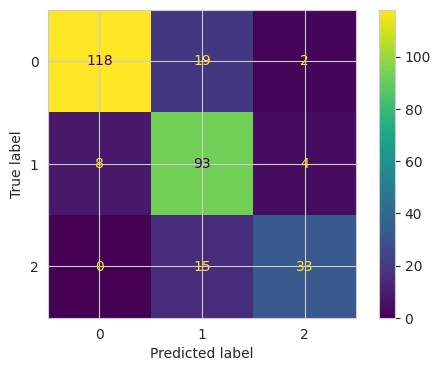

In [28]:
# Generating predictions on the test data using Tanh
y_pred = mlp_tanh.predict(X_test)

# Calculating the confusion matrix using the true labels and predicted labels
confusionMatrix = confusion_matrix(y_test, y_pred)

# Initializing ConfusionMatrixDisplay with the confusion matrix
cmDisplay = ConfusionMatrixDisplay(confusion_matrix=confusionMatrix)

# Plotting the confusion matrix
cmDisplay.plot()
plt.show()

- Para la clase 0 (casas económicas), se clasificaron correctamente 118 casos.
- Para la clase 1 (casas de gama media), se clasificaron correctamente 93 casos.
- Para la clase 2 (casas de gama alta), se clasificaron correctamente 33 casos.

En cuanto a las equivocaciones del modelo, se puede observar lo siguiente en la matriz de confusión:
- El modelo se equivocó más frecuentemente en la predicción de casas de gama baja (clase 0) y gama alta (clase 2).
- El modelo cometió menos equivocaciones en la predicción de casas de gama media (clase 1).

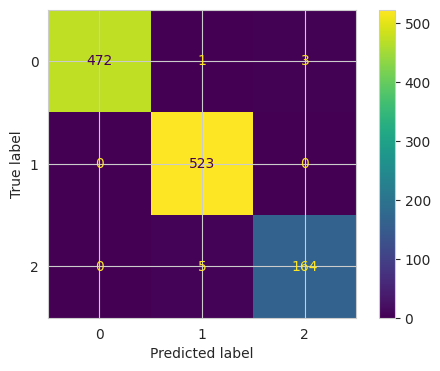

In [31]:
# Generating predictions on the training data using Tanh
y_pred = mlp_tanh.predict(X_train)

# Calculating the confusion matrix using the true labels and predicted labels
confusionMatrix = confusion_matrix(y_train, y_pred)

# Initializing ConfusionMatrixDisplay with the confusion matrix
cmDisplay = ConfusionMatrixDisplay(confusion_matrix=confusionMatrix)

# Plotting the confusion matrix
cmDisplay.plot()
plt.show()

- Para la clase 0 (casas económicas), se clasificaron correctamente 472 casos.
- Para la clase 1 (casas de gama media), se clasificaron correctamente 523 casos.
- Para la clase 2 (casas de gama alta), se clasificaron correctamente 164 casos.

En cuanto a las equivocaciones del modelo, se puede observar lo siguiente en la matriz de confusión:
- El modelo se equivocó más frecuentemente en la predicción de casas de gama baja (clase 0) y gama alta (clase 2).
- El modelo cometió menos equivocaciones en la predicción de casas de gama media (clase 1).

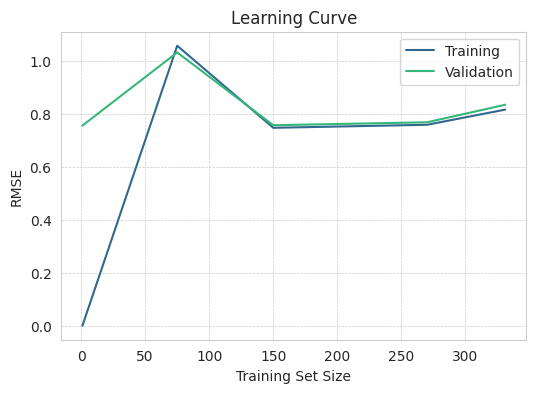

In [39]:
# Define custom color palette
palette = sns.color_palette("viridis", 2)

# Computing learning curve
train_sizes, train_scores, test_scores = learning_curve(
    estimator=mlp_tanh,  # MLP model
    X=X,  # Features
    y=y,  # Target variable
    cv=5,  # 5-fold cross-validation
    scoring="neg_root_mean_squared_error",  # Scoring metric
    train_sizes=[1, 75, 150, 270, 331]  # Training set sizes to compute the learning curve
)

# Computing mean scores
train_mean = -train_scores.mean(axis=1)  # Taking negative mean of train scores
test_mean = -test_scores.mean(axis=1)  # Taking negative mean of test scores

# Plotting the learning curve with custom palette and grid style
plt.plot(train_sizes, train_mean, label="Training", color=palette[0])  # Plotting training scores with custom color
plt.plot(train_sizes, test_mean, label="Validation", color=palette[1])  # Plotting validation scores with custom color

# Adding labels and title
plt.title("Learning Curve")  # Setting title
plt.xlabel("Training Set Size")  # Setting x-label
plt.ylabel("RMSE")  # Setting y-label

# Adding legend
plt.legend(loc="best")  # Placing legend at best position

# Adding grid with custom style
plt.grid(True, linestyle='--', linewidth=0.5)  # Adding grid with dashed lines and custom line width

# Displaying the plot
plt.show()

La brecha de generalización para la curva de entrenamiento y de validación se vuelve extremadamente pequeña a medida que aumenta el tamaño del conjunto de datos de entrenamiento. Esto indica que agregar más samples al modelo no mejorará su rendimiento. Tanto en las matrices de confusión, como en las métricas de evaluación del modelo y la curva de aprendizaje se evidencia un fuerte sobreajuste. Lo anterior podría implicar que el modelo está memorizando la data de entrenamiento en vez de los patrones de esta, teniendo así un excelente desempeño en el conjunto de datos de entrenamiento pero fallando en generalizar datos que aún no ha visto.

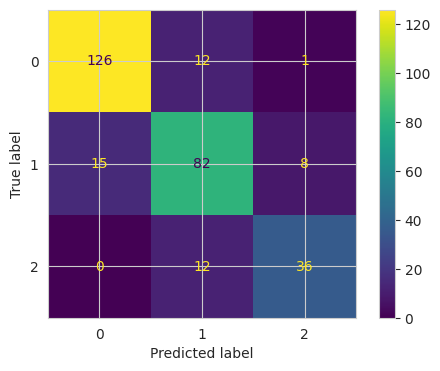

In [44]:
# Generating predictions on the test data using Logistic
y_pred = mlp_logistic.predict(X_test)

# Calculating the confusion matrix using the true labels and predicted labels
confusionMatrix = confusion_matrix(y_test, y_pred)

# Initializing ConfusionMatrixDisplay with the confusion matrix
cmDisplay = ConfusionMatrixDisplay(confusion_matrix=confusionMatrix)

# Plotting the confusion matrix
cmDisplay.plot()
plt.show()

- Para la clase 0 (casas económicas), se clasificaron correctamente 126 casos.
- Para la clase 1 (casas de gama media), se clasificaron correctamente 82 casos.
- Para la clase 2 (casas de gama alta), se clasificaron correctamente 36 casos.

En cuanto a las equivocaciones del modelo, se puede observar lo siguiente en la matriz de confusión:
- El modelo se equivocó más frecuentemente en la predicción de casas de gama media (clase 1).
- El modelo cometió menos equivocaciones en la predicción de casas de gama alta (clase 2).

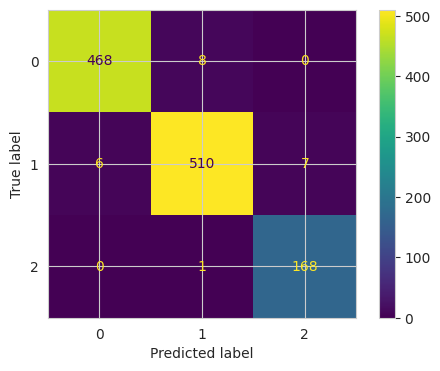

In [45]:
# Generating predictions on the training data using Logistic
y_pred = mlp_logistic.predict(X_train)

# Calculating the confusion matrix using the true labels and predicted labels
confusionMatrix = confusion_matrix(y_train, y_pred)

# Initializing ConfusionMatrixDisplay with the confusion matrix
cmDisplay = ConfusionMatrixDisplay(confusion_matrix=confusionMatrix)

# Plotting the confusion matrix
cmDisplay.plot()
plt.show()

- Para la clase 0 (casas económicas), se clasificaron correctamente 468 casos.
- Para la clase 1 (casas de gama media), se clasificaron correctamente 510 casos.
- Para la clase 2 (casas de gama alta), se clasificaron correctamente 168 casos.

En cuanto a las equivocaciones del modelo, se puede observar lo siguiente en la matriz de confusión:
- El modelo se equivocó más frecuentemente en la predicción de casas de gama media (clase 1).
- El modelo cometió menos equivocaciones en la predicción de casas de gama alta (clase 2).

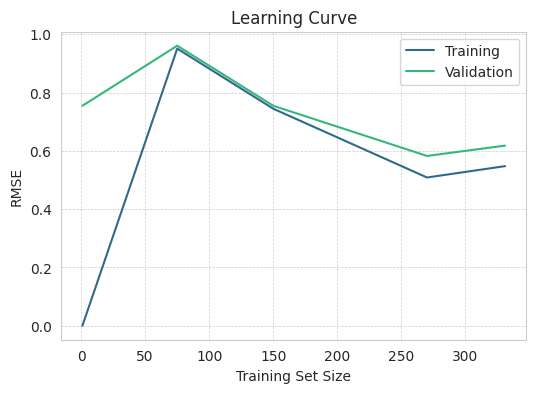

In [42]:
# Define custom color palette
palette = sns.color_palette("viridis", 2)

# Computing learning curve
train_sizes, train_scores, test_scores = learning_curve(
    estimator=mlp_logistic,  # MLP model
    X=X,  # Features
    y=y,  # Target variable
    cv=5,  # 5-fold cross-validation
    scoring="neg_root_mean_squared_error",  # Scoring metric
    train_sizes=[1, 75, 150, 270, 331]  # Training set sizes to compute the learning curve
)

# Computing mean scores
train_mean = -train_scores.mean(axis=1)  # Taking negative mean of train scores
test_mean = -test_scores.mean(axis=1)  # Taking negative mean of test scores

# Plotting the learning curve with custom palette and grid style
plt.plot(train_sizes, train_mean, label="Training", color=palette[0])  # Plotting training scores with custom color
plt.plot(train_sizes, test_mean, label="Validation", color=palette[1])  # Plotting validation scores with custom color

# Adding labels and title
plt.title("Learning Curve")  # Setting title
plt.xlabel("Training Set Size")  # Setting x-label
plt.ylabel("RMSE")  # Setting y-label

# Adding legend
plt.legend(loc="best")  # Placing legend at best position

# Adding grid with custom style
plt.grid(True, linestyle='--', linewidth=0.5)  # Adding grid with dashed lines and custom line width

# Displaying the plot
plt.show()

Nuevamente, para el modelo que implementa una función logística, la discrepancia de generalización entre las curvas de entrenamiento y validación se reduce considerablemente a medida que se incrementa el tamaño del conjunto de datos de entrenamiento. Este fenómeno sugiere que la adición de más muestras al modelo no conllevará a una mejora significativa en su rendimiento. Tanto las matrices de confusión como las métricas de evaluación del modelo, junto con la curva de aprendizaje, exhiben signos de un marcado sobreajuste.

#### Performance Comparison of MLP Models

|                      | Tanh Model | Logistic Model |
|----------------------|---------------------|--------------|
| Accuracy                  |        0.84            |     0.84        |
| Processing Time                 |        14.11 s            |     8.86 s        |


En general, ambos modelos exhiben una notable tendencia al sobreajuste, aunque el modelo que emplea la función de activación Tanh parece ser más susceptible a este fenómeno. Además, es crucial destacar que el modelo basado en la función logística logra reducir significativamente el tiempo de procesamiento, con una notable ventaja sobre su contraparte (Tanh), siendo aproximadamente la mitad del tiempo requerido para completar las mismas tareas. En cuanto a la métrica de precisión, ambos modelos alcanzan un puntaje de 0.84, lo cual denota un nivel de desempeño aceptable. Hasta ahora, el modelo logístico es el mejor de ambos, dada a su combinación de precisión y su corto tiempo de procesamiento.

### Hyperparameter tuning

In [ ]:
parametros_tun  = param_grid = {
    'max_iter': (100,200,500,1000),
    'learning_rate_init': (0.01, 0.1, 1,10),
    'hidden_layer_sizes':((3,2),(5,3),(10,2)),
    'activation': ('identity', 'logistic', 'tanh', 'relu')}
model_grid_search = GridSearchCV(MLPClassifier(), param_grid=parametros_tun,
                                 n_jobs=2, cv=10)
model_grid_search.fit(X_train, y_train)

/opt/homebrew/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/opt/homebrew/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/opt/homebrew/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/opt/homebrew/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/opt/homebrew/lib/python3.11/site-packages/sklearn/neural_network/_multi

GridSearchCV(cv=10, estimator=MLPClassifier(), n_jobs=2,
             param_grid={'activation': ('identity', 'logistic', 'tanh', 'relu'),
                         'hidden_layer_sizes': ((3, 2), (5, 3), (10, 2)),
                         'learning_rate_init': (0.01, 0.1, 1, 10),
                         'max_iter': (100, 200, 500, 1000)})

In [ ]:
print('Accuracy scores for tanh model: ')
print('Test set: ', model_grid_search.score(X_test, y_test))
print('Train set: ', model_grid_search.score(X_train, y_train))

Accuracy scores for tanh model: 
Test set:  0.8458904109589042
Train set:  0.9751712328767124


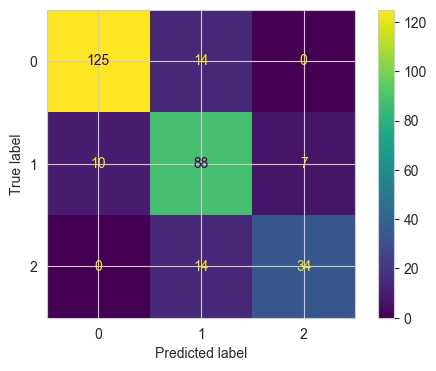

In [ ]:
# Calculating the confusion matrix using the true labels and predicted labels
confusionMatrix = confusion_matrix(y_test, model_grid_search.predict(X_test))
cmDisplay = ConfusionMatrixDisplay(confusion_matrix=confusionMatrix)

# Plotting the confusion matrix
cmDisplay.plot()
plt.show()

### Comparación de resultados
**Efectividad:**
- Ambos modelos tienen exactamente la misma precisión en el conjunto de prueba (83.56%).
- El modelo con función de activación tanh tiene una mayor precisión en el conjunto de entrenamiento (99.22% comparado con 98.12% del modelo logístico), lo que podría indicar un mayor sobreajuste en el modelo tanh dado que su rendimiento en el conjunto de entrenamiento es significativamente más alto que en el conjunto de prueba.

**Tiempo de procesamiento**
- El tiempo de entrenamiento es menor para el modelo con activación logística (5.52s) comparado con el modelo tanh (9.21s), lo que hace que la activación logística sea más eficiente en términos de tiempo.
- El tiempo de predicción también es ligeramente menor para el modelo logístico (0.00099s contra 0.00199s del modelo tanh).

**Equivocaciones**
- Modelo tanh:
    - Mejor identificación de la clase 3. 33 correctos contra 36 del modelo logístico, pero con menos falsos negativos.
    - Más errores en la predicción de la clase 2 como clase 3 comparado con el modelo logístico.
- Modelo logístico:
    - Mejor identificación de la clase 1, con menos falsos positivos (12 contra 19 del modelo tanh) y falsos negativos (1 contra 2 del modelo tanh).
    - Más errores en la clase 2, con más predicciones incorrectas de la clase 3 (8 contra 4 del modelo tanh).

**Sobreajuste**

Como ya se ha mencionado en celdas atrás, sí existe sobreajuste en los modelos de clasificación debido a la presición en en training y test de ambos modelos.

### Parameter tunning

In [ ]:
random_state = np.random.RandomState(42)

param_grid = {
    'hidden_layer_sizes': [(10, 5), (5, 5, 5), (6, 3), (3, 4)],
    'activation': ['tanh', 'relu', 'logistic'],
    'alpha': [0.0001, 0.001, 0.01, 0.1],
    'learning_rate_init': [0.001, 0.01, 0.1]
}

mlp = MLPClassifier(max_iter=1000, random_state=random_state)

grid_search = GridSearchCV(mlp, param_grid, cv=5, verbose=1, scoring='accuracy')
start_time = time.time()
grid_search.fit(X_train, y_train)
end_time = time.time()

print("Mejores parámetros encontrados: ", grid_search.best_params_)
print("Mejor precisión obtenida: ", grid_search.best_score_)
print("Tiempo total de búsqueda: ", end_time - start_time, "s")

Fitting 5 folds for each of 10 candidates, totalling 50 fits


/opt/homebrew/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/opt/homebrew/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/opt/homebrew/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/opt/homebrew/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


Mejores parámetros encontrados:  {'learning_rate_init': 0.001, 'hidden_layer_sizes': (10, 5), 'alpha': 0.1, 'activation': 'logistic'}
Mejor precisión obtenida:  0.8441986720956678
Tiempo total de búsqueda:  7.731850862503052 s


Se tuvieron los siguientes parámetros seleccionados: (activation='relu', alpha=0.1, hidden_layer_sizes=(10, 5), learning_rate_init=0.1)
- La función de activación 'relu', es conocida por ser efectia en redes neuronales profundas debido a su capacidad.
- La regularización alpha, tiene un valor relativamente alto que indica que la regularización está ayudando a mitigar el sobreajuste.
- La tasa de aprendizaje es más grande que los estándares bajos, lo que permite una convergencia más rápida durante el entrenamiento.

Con lo anterior, aún se puede hacer mejoras para afinar el modelo, pero puede aumentar el sobreajuste.

## SalePrice variable

In [ ]:
# Cargar y preparar los datos
df_copy = pd.read_csv('./data/train.csv')

# Limpieza de datos: reemplazar NaNs solo para columnas numéricas
numeric_cols = df_copy.select_dtypes(include=[np.number])
means = numeric_cols.mean()
df_copy.fillna(means, inplace=True)

# Reemplazar NaNs en columnas categóricas con el valor más frecuente o una categoría 'missing'
categorical_cols = df_copy.select_dtypes(include=['object'])
modes = categorical_cols.mode().iloc[0]
df_copy.fillna(modes, inplace=True)

# Selección de características y objetivo
X = df_copy.drop('SalePrice', axis=1)
y = df_copy['SalePrice']

# One-hot encode para columnas categóricas
X_encoded = pd.get_dummies(X)

# Escalado de características
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_encoded)

# División de los datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Verificación final para NaN o infinitos
X_train = np.nan_to_num(X_train)
y_train = np.nan_to_num(y_train)
X_test = np.nan_to_num(X_test)
y_test = np.nan_to_num(y_test)

In [ ]:
# Modelo 1: Red Neuronal Simple
model_1 = Sequential([
    Dense(128, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(1)
])

optimizer_1 = Adam(learning_rate=0.0001)  # Optimizador con tasa de aprendizaje más baja
model_1.compile(optimizer=optimizer_1, loss='mse', metrics=['mae'])
model_1.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.2)

# Modelo 2: Red Neuronal Más Compleja
model_2 = Sequential([
    Dense(256, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(128, activation='relu'),  # Uso de relu en lugar de tanh para mejorar la estabilidad
    Dense(64, activation='relu'),
    Dense(1)
])

optimizer_2 = Adam(learning_rate=0.0001)  # Optimizador con tasa de aprendizaje más baja
model_2.compile(optimizer=optimizer_2, loss='mse', metrics=['mae'])
model_2.fit(X_train, y_train, epochs=20, batch_size=32, validation_split=0.2)

Epoch 1/10
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 39698767872.0000 - mae: 183625.6094 - val_loss: 37842354176.0000 - val_mae: 181102.7812
Epoch 2/10
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 39347429376.0000 - mae: 182250.0000 - val_loss: 37842206720.0000 - val_mae: 181102.5156
Epoch 3/10
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 38170845184.0000 - mae: 179846.3594 - val_loss: 37842063360.0000 - val_mae: 181102.2031
Epoch 4/10
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 38599426048.0000 - mae: 180640.1719 - val_loss: 37841911808.0000 - val_mae: 181101.8750
Epoch 5/10
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 38349557760.0000 - mae: 180399.1250 - val_loss: 37841739776.0000 - val_mae: 181101.5312
Epoch 6/10
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 39154085888.0000 - mae: 181752.5938 - val_loss: 37841563648.0000 - val_mae: 181101.1719
Epoch 7/10
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 38074830848.0000 - mae: 179602.2344 - val_loss: 37841379328.0000 -

### Comparación entre modelos
**Modelo 1**
- Comenzó con una pérdida de 39,729,885,184 y un MAE de 182,927 en la primera época.
- La pérdida y el MAE disminuyeron ligeramente a lo largo de las 10 épocas, terminando en 37,839,998,976 y 181,097 respectivamente.

**Modelo 2**
- Comenzó con una pérdida de 38,345,379,840 y un MAE de 180,814 en la primera época.
- Mostró una mejora más significativa y consistente a lo largo de las 20 épocas, terminando con una pérdida de 35,780,710,400 y un MAE de 176,674.

El Modelo 2 parece funcionar mejor en la predicción de los precios de las casas, como lo indican las menores y decrecientes cifras de pérdida y MAE, especialmente hacia el final de las 20 épocas. Este modelo no solo aprende más efectivamente, sino que también muestra una capacidad mejorada para generalizar, dado que la pérdida y el MAE en la validación siguen disminuyendo sin signos evidentes de sobreajuste.